# Movies Dataset

## Preproceso

Algunas columnas del dataset vienen en json y hay que extraerle los valores para un mejor analisis. 

In [1]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt

# Grid to true
plt.rcParams['axes.grid'] = True

Las columnas ['genres', 'production_companies', 'production_countries', 'spoken_languages'] son una lista de objetos json, y la columna 'belongs_to_collection' es un objeto json. El campo 'name' es el que nos interesa en todos los casos, por eso los metodos de extraccion se encargan de extraer ese solo. 

In [2]:

df = pd.read_csv('movies_metadata.csv')
for col in ['genres',
            'production_companies',
            'production_countries',
            'spoken_languages']:
    
    # Accede a todos los dicts de cada lista y guarda el campo 'name' en la lista a retornar
    df[col] = df[col].fillna('[]').apply(literal_eval).apply(
        lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# Extrae el campo 'name' de cada dict en la columna
df['belongs_to_collection'] = df['belongs_to_collection'].fillna(
    'None').apply(literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else None)

C:\Users\Lucho\AppData\Local\Temp\ipykernel_12200\1033243750.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_metadata.csv')


## Exploración

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45466 non-null  object 
 13  production_countries   45466 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
df.sample(5).transpose()

,12241,12778,12476,42012,22198
adult,False,False,False,False,False
belongs_to_collection,None,Simon Brenner Collection,None,None,None
budget,7800000,0,0,0,0
genres,[Drama],"[Comedy, Crime, Thriller]","[Comedy, Music, Romance]","[Thriller, Horror]","[TV Movie, Drama, Romance, Western]"
homepage,NaN,NaN,NaN,NaN,NaN
id,25460,9010,43797,363689,26131
imdb_id,tt0396190,tt0386038,tt0034241,tt4229298,tt0340380
original_language,en,de,en,en,en
original_title,Return to Sender,Silentium,Sun Valley Serenade,The Unspoken,Straight From the Heart
overview,While fighting for a woman who sits on death r...,Silentium is a 2004 Austrian film based on a n...,Skating star Sonja Henie and the Glenn Miller ...,In 1997 the close-knit Anderson family vanishe...,"Jordan Donavan, a photographer in New York, is..."


In [5]:
# Crear un set con todos los géneros
genre_set = set()
df['genres'].apply(lambda x: genre_set.update(x))

0        None
1        None
2        None
3        None
4        None
         ... 
45461    None
45462    None
45463    None
45464    None
45465    None
Name: genres, Length: 45466, dtype: object

In [6]:
# generos ordenados por cantidad de peliculas
genre_count = {}
for genre in genre_set:
    genre_count[genre] = df['genres'].apply(lambda x: genre in x).sum()

genre_count = pd.Series(genre_count).sort_values(ascending=False)
genre_count

Drama                                    20265
Comedy                                   13182
Thriller                                  7624
Romance                                   6735
Action                                    6596
Horror                                    4673
Crime                                     4307
Documentary                               3932
Adventure                                 3496
Science Fiction                           3049
Family                                    2770
Mystery                                   2467
Fantasy                                   2313
Animation                                 1935
Foreign                                   1622
Music                                     1598
History                                   1398
War                                       1323
Western                                   1042
TV Movie                                   767
Carousel Productions                         1
Telescene Fil

In [7]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'].fillna(0, inplace=True)
df['budget'] = df['budget'].astype('int64')
df['budget'].describe()


count    4.546600e+04
mean     4.224300e+06
std      1.742359e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

In [8]:
# Create copy
df2 = df.copy()

# Filter outliers for budget
df = df[(df['budget'] > 1000) & (df['budget'] < 1000000)]

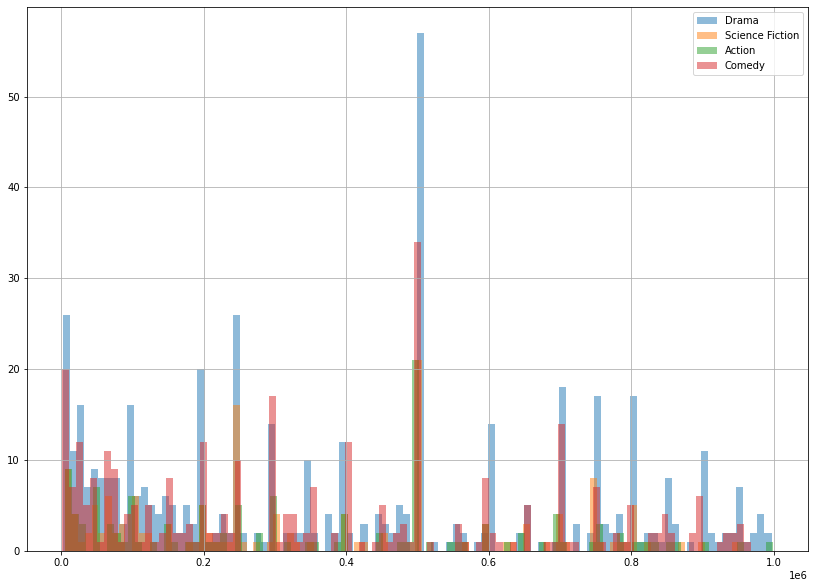

In [9]:
# histograma para comparar los presupuestos de las peliculas de drama, ciencia ficcion, accion y comedia
fig, ax = plt.subplots(figsize=(14, 10))
for genre in ['Drama', 'Science Fiction', 'Action', 'Comedy']:
    df[df['genres'].apply(lambda x: genre in x)]['budget'].hist(
        bins=100, alpha=0.5, label=genre, ax=ax)
ax.legend()

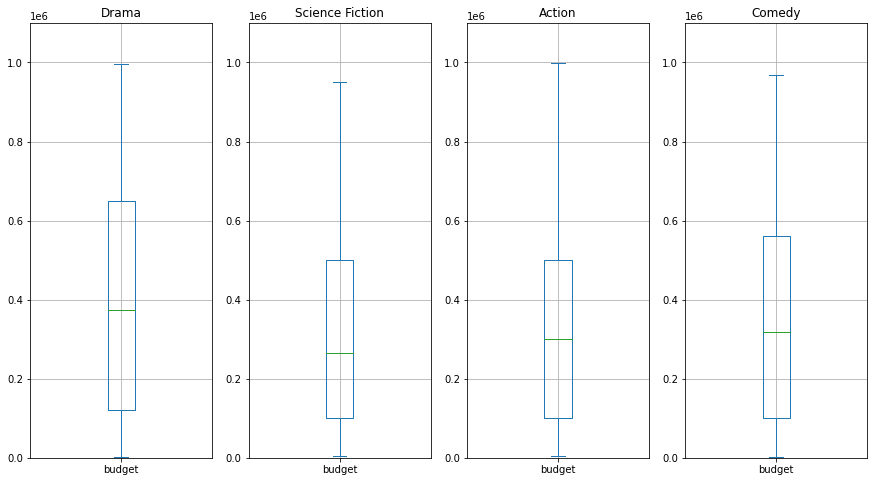

In [10]:
# boxplots para los presupuestos de las peliculas de drama, ciencia ficcion, accion y comedia
fig, axes = plt.subplots(1, 4, figsize=(15, 8))
for i, genre in enumerate(['Drama', 'Science Fiction', 'Action', 'Comedy']):
    df[df['genres'].apply(lambda x: genre in x)]['budget'].plot(
        kind='box', ax=axes[i], title=genre)
    axes[i].set_ylim(0, 1100000)


### Comparacion de los presupuestos para las peliculas de Drama, Ciencia Ficcion, Accion y Comedia que costaron menos de 1000000
- El histograma nos indica que muchas peliculas coinciden en el numero de presupuesto. Esto puede ser debido a redondeos al momento de realizar la carga de datos. 
- Los graficos de cajas nos indican que existen algunas diferencias, sobretodo en los limites superiores, de los gastos de las peliculas para estos generos. 
    - Las peliculas de drama suelen ser las que mas presupuesto requieren.
    - Las peliculas de ciencia ficcion y accion, menos presupuesto. Esto no es lo esperado ya que ciencia ficcion y accion suelen requerir de efectos especiales y CGI, lo cual no es barato. Es posible que las peliculas de estos generos, que son de bajo presupuesto, hayan gastado menos que otras de drama donde el presupuesto necesario sea menor.
    - Las peliculas de comedia superan en presupuesto a Accion y Ciencia Ficcion, pero sin estar por encima de las peliculas de Drama. 

In [11]:
# Restaurar el dataframe original
df = df2.copy()

## Casos testigo: Avatar, The Godfather, Lord of the Rings

In [12]:
# Transformar columna de popularidad a numerica
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

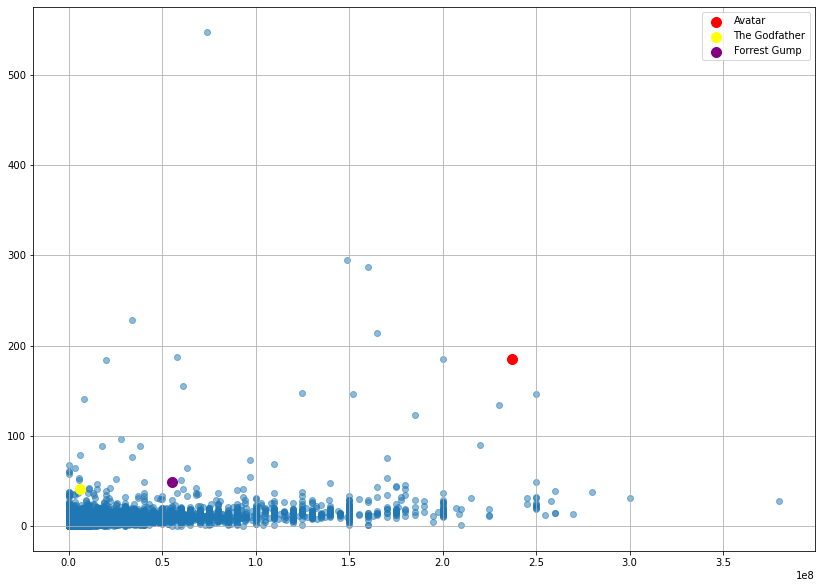

In [13]:
# Scatterplot entre presupuesto y popularidad.
fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(df['budget'], df['popularity'], alpha=0.5)

ax.scatter(df[df['original_title'] == 'Avatar']['budget'],
              df[df['original_title'] == 'Avatar']['popularity'], s=100, c='red', label='Avatar')
ax.scatter(df[df['original_title'] == 'The Godfather']['budget'],
                df[df['original_title'] == 'The Godfather']['popularity'], s=100, c='yellow', label='The Godfather')
ax.scatter(df[df['original_title'] == 'Forrest Gump']['budget'],
                df[df['original_title'] == 'Forrest Gump']['popularity'], s=100, c='purple', label='Forrest Gump')
ax.legend()


In [14]:
# Analizar peliculas donde la production company tenga 'BBC' en el nombre
df[df['production_companies'].apply(lambda x: 'BBC' in str(x))][['original_title', 'production_companies']]

,original_title,production_companies
27,Persuasion,[BBC Films]
97,Heidi Fleiss: Hollywood Madam,"[British Broadcasting Corporation (BBC), Westd..."
145,An Awfully Big Adventure,"[Fine Line Features, BBC, British Screen Produ..."
295,Priest,"[BBC Films, PolyGram Filmed Entertainment, Mir..."
380,A Man of No Importance,"[BBC Films, Majestic Films International, Litt..."
...,...,...
44335,Red Nose Day Actually,"[BBC Films, NBC Productions, Portobello Studios]"
44533,Das Versprechen,"[Danmarks Radio (DR), SVT, British Broadcastin..."
44542,Macbeth,"[PBS, BBC, Gravitas Ventures]"
44733,Heavy Metal Britannia,[BBC]


### Peliculas producidas por la BBC

In [15]:
# Presupuesto para peliculas de la BBC
df[df['production_companies'].apply(lambda x: 'BBC' in str(x))]['budget'].describe()

count    3.500000e+02
mean     3.750200e+06
std      1.348718e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.150000e+08
Name: budget, dtype: float64

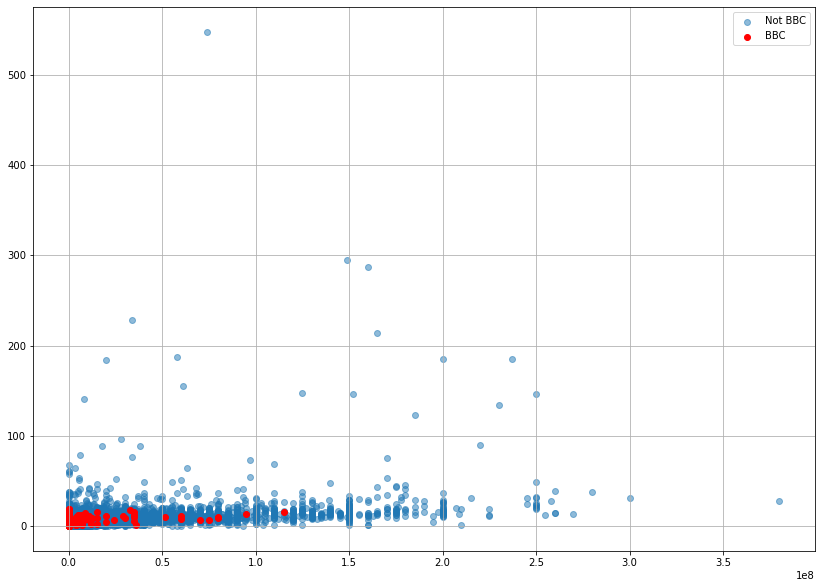

In [19]:
# Scatterplot entre presupuesto y popularidad para peliculas de la BBC y peliculas que no son de la BBC
fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(df[~df['production_companies'].apply(lambda x: 'BBC' in str(x))]['budget'],
                df[~df['production_companies'].apply(lambda x: 'BBC' in str(x))]['popularity'], alpha=0.5, label='Not BBC')
ax.scatter(df[df['production_companies'].apply(lambda x: 'BBC' in str(x))]['budget'],
              df[df['production_companies'].apply(lambda x: 'BBC' in str(x))]['popularity'], label='BBC', c='red')
ax.legend()
